In [1]:
# Matplotlib inline magic command
%matplotlib inline

# Adding dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Loading data files
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

# Read in data files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Data Check
city_data_df.count()
city_data_df.isnull().sum()
city_data_df.dtypes
city_data_df['type'].unique()
sum(city_data_df['type']=='Urban')
sum(city_data_df['type']=='Rural')
ride_data_df.count()
ride_data_df.isnull().sum()
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [3]:
# Merging Dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
# pyber_data_df.head()

In [4]:
# Creating dataframes by city type
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [5]:
# Summing rides by city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [6]:
# Calculating the mean for fares by city type
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [7]:
# Calculating the mean number of drivers by city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

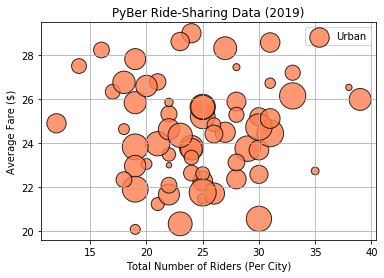

In [8]:
# Create a scatter plot of the urban total number of riders per city by the mean fare in dollars
fig, ax = plt.subplots()
mean_fare_urban_scatter = ax.scatter(urban_ride_count, urban_avg_fare,
                               s=10*urban_driver_count, label='Urban',
                               c='coral', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.legend()
ax.grid(True)
plt.show()

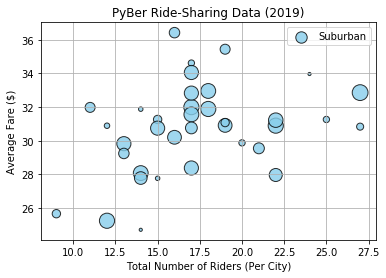

In [9]:
# Create a scatter plot of the sburban total number of riders per city by the mean fare in dollars
fig, ax = plt.subplots()
mean_fare_suburban_scatter = ax.scatter(suburban_ride_count, suburban_avg_fare,
                               s=10*suburban_driver_count, label='Suburban',
                               c='skyblue', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.legend()
ax.grid(True)
plt.show()

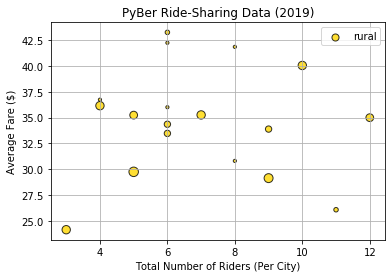

In [10]:
# Create a scatter plot of the rural total number of riders per city by the mean fare in dollars
fig, ax = plt.subplots()
mean_fare_rural_scatter = ax.scatter(rural_ride_count, rural_avg_fare,
                               s=10*rural_driver_count, label='rural',
                               c='gold', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.legend()
ax.grid(True)
plt.show()

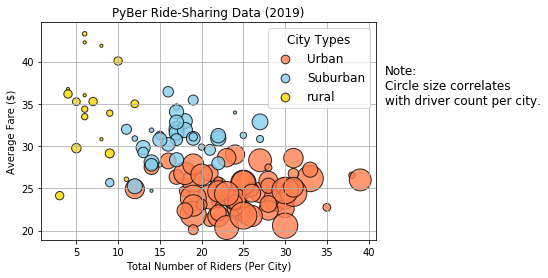

In [11]:
# Create a scatter plot of the urban total number of riders per city by the mean fare in dollars
fig, ax = plt.subplots()

mean_fare_urban_scatter = ax.scatter(urban_ride_count, urban_avg_fare,
                               s=10*urban_driver_count, label='Urban',
                               c='coral', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.legend()
ax.grid(True)

# Create a scatter plot of the sburban total number of riders per city by the mean fare in dollars
mean_fare_suburban_scatter = ax.scatter(suburban_ride_count, suburban_avg_fare,
                               s=10*suburban_driver_count, label='Suburban',
                               c='skyblue', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.legend()

# Create a scatter plot of the rural total number of riders per city by the mean fare in dollars
mean_fare_rural_scatter = ax.scatter(rural_ride_count, rural_avg_fare,
                               s=10*rural_driver_count, label='rural',
                               c='gold', alpha=0.8, linewidths=1,
                               edgecolors='black')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.grid(True)
# Creating legend
lgnd = ax.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
ax.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
plt.show()


# Save the figure.
fig.savefig(fname='analysis/Fig1.png', orientation='landscape',bbox_inches='tight')

In [12]:
# Use describe function for summary statistics (Urban Rides)
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [13]:
# Use describe function for summary statistics (Suburban Rides)
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [14]:
# Use describe function for summary statistics (Rural Rides)
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [15]:
# Use mean function for Urban, Suburban, and rural rides
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [16]:
# Use median function for Urban, Suburban, and rural rides
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [17]:
# Use mode function for Urban, Suburban, and rural rides
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [18]:
# Use Numpy to calculate mean, median, and mode for urban rides
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [19]:
# Use Numpy to calculate mean, median, and mode for suburban rides
mean_suburban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 24.62.
The median for the ride counts for suburban trips is 24.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [20]:
# Use Numpy to calculate mean, median, and mode for rural rides
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [21]:
# Get urban, suburban, and rural fares
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [22]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [23]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [24]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [25]:
# Get urban driver count
urban_drivers = urban_cities_df['driver_count']
# suburban_drivers.head()

In [26]:
# Get surban driver count
suburban_drivers = suburban_cities_df['driver_count']
# suburban_drivers.head()

In [27]:
# Get rural driver count
rural_drivers = rural_cities_df['driver_count']
# rural_drivers.head()

In [28]:
# Calculate the measures of central tendency for the average urban driver count
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of urban drivers is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of urban drivers is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of urban drivers is {mode_urban_drivers}.")

The mean number of urban drivers is 36.68.
The median number of urban drivers is 37.00.
The mode number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [29]:
# Calculate the measures of central tendency for the average suburban driver count
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of suburban drivers is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of suburban drivers is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of suburban drivers is {mode_suburban_drivers}.")

The mean number of suburban drivers is 13.71.
The median number of suburban drivers is 16.00.
The mode number of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [30]:
# Calculate the measures of central tendency for the average rural driver count
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of rural drivers is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of rural drivers is {mode_rural_drivers}.")

The mean number of rural drivers is 4.30.
The median number of rural drivers is 4.00.
The mode number of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


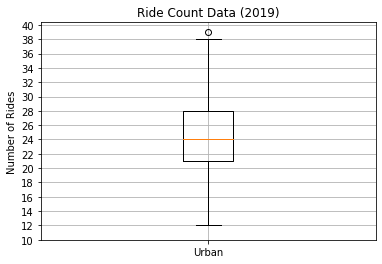

In [31]:
# Create Urban cities ride count box-and-whisker plot
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

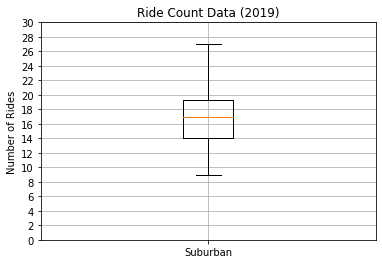

In [32]:
# Create Rural cities ride count box-and-whisker plot
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 32, step=2.0))
ax.grid()
plt.show()

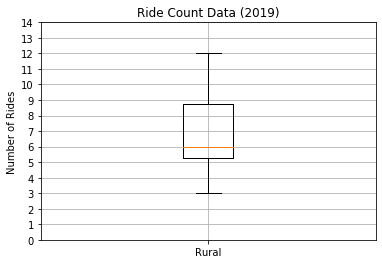

In [33]:
# Create Urban cities ride count box-and-whisker plot
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 15, step=1.0))
ax.grid()
plt.show()

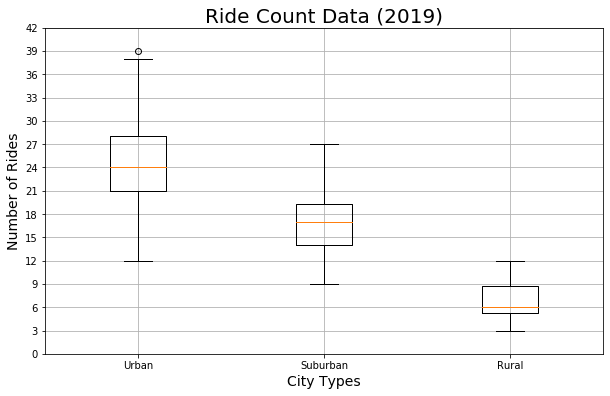

In [34]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [35]:
# Find urban outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


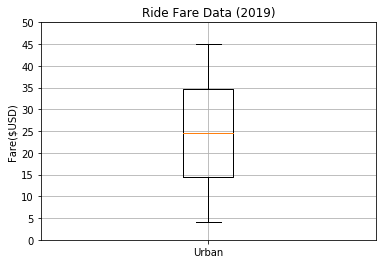

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [36]:
# Create urban fare box-and-whisker plot
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [37]:
# Sum fares by city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [38]:
# Total all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [40]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

# Calculate the percentage of fare for each city type.
# type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
# type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

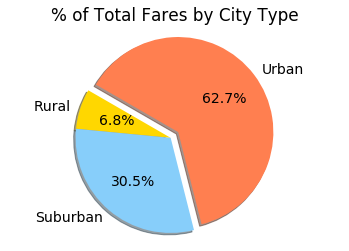

In [50]:
# Build the percentage of fares by city type pie chart.
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

fig1, ax1 = plt.subplots()
ax1.pie(type_percents, colors=['gold', 'lightskyblue', 'coral'], explode=[0, 0, 0.1], labels=['Rural', 'Suburban', 'Urban'],
        autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% of Total Fares by City Type')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [51]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

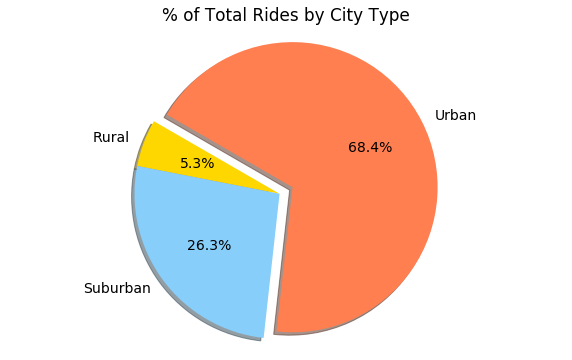

In [54]:
# Build the percentage of rides by city type pie chart.

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(ride_percents, colors=['gold', 'lightskyblue', 'coral'], explode=[0, 0, 0.1], labels=['Rural', 'Suburban', 'Urban'],
        autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% of Total Rides by City Type')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
plt.show()

In [55]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

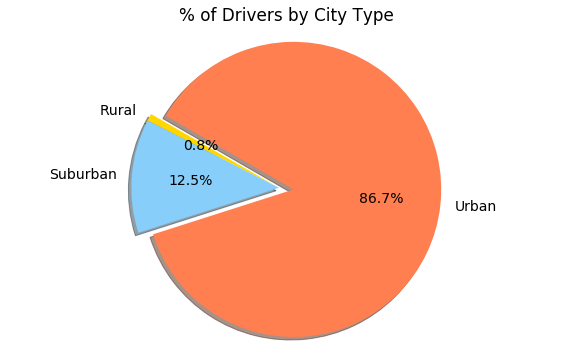

In [56]:
# Build the percentage of drivers by city type pie chart.

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(driver_percents, colors=['gold', 'lightskyblue', 'coral'], explode=[0, 0, 0.1], labels=['Rural', 'Suburban', 'Urban'],
        autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% of Drivers by City Type')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
plt.show()